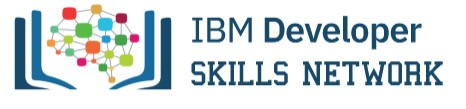

#Extracting and Visualizing Stock Data
##Description
Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.

###Table of Contents

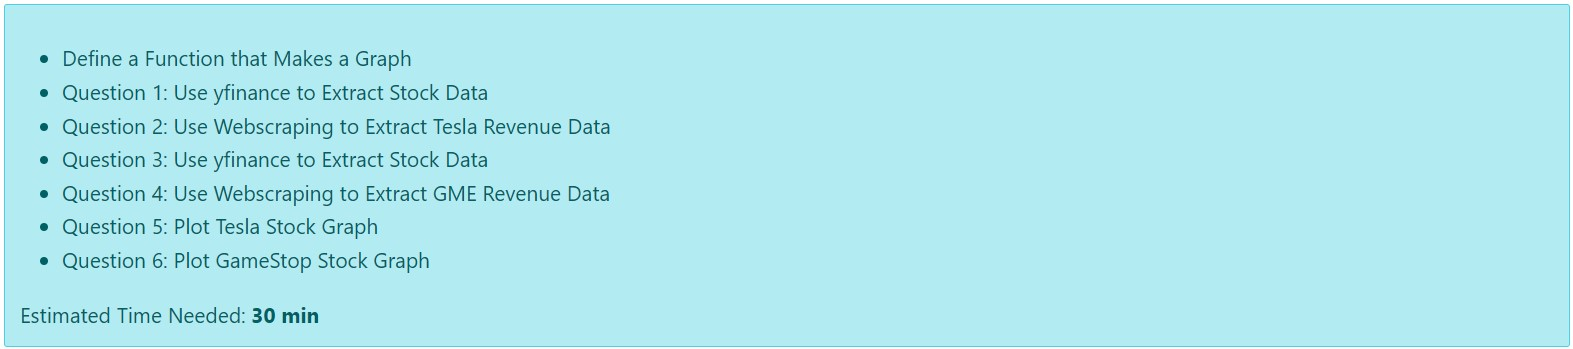

In [ ]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Define Graphing Function
In this section, we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. 

It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

#Question 1: Use yfinance to Extract Stock Data
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

In [4]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

In [5]:
tesla_data = tesla.history(period="max")

**Reset the index** using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function.

In [ ]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

# Question 2: Use Webscraping to Extract Tesla Revenue Data
Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named html_data.

In [7]:
url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

Parse the html data using beautiful_soup.

In [8]:
soup = BeautifulSoup(html_data,"html5lib")

Using beautiful soup extract the table with Tesla Quarterly Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column.

In [ ]:
tesla_revenue= pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue=tesla_revenue.rename(columns = {'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace = False)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",","").str.replace("$","")
tesla_revenue.head()

Click here if you need help removing the dollar sign and comma

If you parsed the HTML table by row and column you can use the replace function on the string

    revenue = col[1].text.replace("$", "").replace(",", "")

If you use the read_html function you can use the replace function on the string representation of the column

    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")

Remove the rows in the dataframe that are empty strings or are NaN in the Revenue column. Print the entire tesla_revenue DataFrame to see if you have any.

In [ ]:
tesla_revenue

Click here if you need help removing the Nan or empty strings



If you have NaN in the Revenue column

    tesla_revenue.dropna(inplace=True)

If you have emtpty string in the Revenue column

    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the tesla_revenue dataframe using the tail function.

In [ ]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

#Question 3: Use yfinance to Extract Stock Data
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [12]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to max so we get information for the maximum amount of time.

In [13]:
gme_data=gamestop.history(period="max")

Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function.

In [ ]:
gme_data.reset_index(inplace=True)
gme_data.head()

#Question 4: Use Webscraping to Extract GME Revenue Data
Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue. Save the text of the response as a variable named html_data.

In [15]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data=requests.get(url).text

Parse the html data using beautiful_soup.

In [16]:
soup = BeautifulSoup(html_data,"html5lib")

Using beautiful soup extract the table with GameStop Quarterly Revenue and store it into a dataframe named gme_revenue. The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column using a method similar to what you did in Question 2.

In [ ]:
gme_revenue= pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')[0]
gme_revenue=gme_revenue.rename(columns = {'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace = False)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",","").str.replace("$","")

Display the last five rows of the gme_revenue dataframe using the tail function.

In [ ]:
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

#Question 5: Plot Tesla Stock Graph
Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(tesla_data, tesla_revenue, 'Tesla')

In [ ]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data Graph')

#Question 6: Plot GameStop Stock Graph
Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop').

In [ ]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data Graph')

About the Authors:
Joseph Santarcangelo has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani